# Ondas en una cuerda

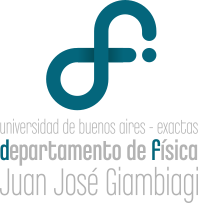  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado

Se tiene una cuerda de longitud $L$ y densidad lineal de masa $\mu$ sometida a una tensión $T_{0}$.
Proponga como solución de la ecuación de ondas para un modo normal a la expresión: $\psi(x,t)= A \sin{ \left(k x+ \varphi \right ) } \cos{ \left( \omega t + \theta \right) }$.
Tome el sistema de coordenadas con $x=0$ en un extremo de la cuerda y $x=L$ en el otro.
Encuentre la forma particular que adopta la solución propuesta en los siguientes casos: 
1. $\psi(0,t) = \psi(L,t) = 0$ (ambos extremos están fijos). 
1. $\psi(0,t)= 0$ y $\frac{\partial \psi}{\partial x}(L,t)= 0$ (un extremo está fijo y el otro está libre).
	¿Imponer que un extremo se encuentre "libre" es equivalente a no imponer condiciones de contorno sobre ese extremo?
	¿Cómo lograría un extremo "libre" para la cuerda? 
1. $\frac{\partial \psi}{\partial x}(0,t)= \frac{\partial\psi}{\partial x}(L,t)=0$ (ambos extremos se encuentran libres).
	¿A qué corresponde el modo de frecuencia mínima?
	¿Cuál es la frecuencia de oscilación de ese modo? 
1. Ahora tome un sistema de coordenadas con $x=0$ en el centro de la cuerda.
	Halle la forma que adopta la solución general propuesta si $\psi(-L/2,t)= \psi(L/2,t)= 0$ (ambos extremos fijos).

## Resolución

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
A, k, omega, L= sym.symbols('A, k, omega, L', positive= True) # parámetros físicos
x, t, phi, theta = sym.symbols(r'x, t, \varphi, theta')
psi = sym.Function('\psi')(x,t)

El enunciado propone la solución

In [3]:
psi_enunciado = sym.Eq(psi, A* sym.sin(k*x + phi )* sym.cos(omega*t + theta), evaluate= False )
psi_enunciado

Utilizaremos una variante que facilita las cuentas en la parte espacial.

In [4]:
B, C = sym.symbols('B, C', positive= True)
psi_propuesta = sym.Eq(psi, (B* sym.sin(k*x) + C* sym.cos(k*x) )* sym.cos(omega*t + theta) )
psi_propuesta

### $\psi(0,t) = \psi(L,t) = 0$ (ambos extremos están fijos). 
Resuelto en clase.
Tarea.

### $\psi(0,t)= 0$ y $\frac{\partial \psi}{\partial x}(L,t)= 0$ (un extremo está fijo y el otro está libre).

#### Condición en $x= 0$

In [5]:
psi_izquierda_condición = psi_propuesta.subs([(x, 0), (psi.subs(x,0), 0) ] )
psi_izquierda_condición

In [6]:
C_izquierda = sym.Eq(C, sym.solveset(psi_izquierda_condición, C).args[0], evaluate= False )
C_izquierda

La solución general ahora es

In [7]:
psi_izquierda = psi_propuesta.subs(C, sym.solveset(psi_izquierda_condición, C).args[0])
psi_izquierda

#### Condición en $x= L$

Siendo la derivada de esto con $x$

In [8]:
sym.Eq(psi_izquierda.lhs.diff(x), psi_izquierda.rhs.diff(x) )

La condición en el extremo $x=L$ queda

In [9]:
psi_derecha_condición = sym.Eq(0, psi_izquierda.rhs.diff(x).subs(x,L) )
psi_derecha_condición

In [10]:
k_condiciones = sym.Eq(k, sym.solveset(psi_derecha_condición, k).args[0], evaluate= False )
k_condiciones

Es una solución, pero no muy satisfactoria.
Sería $\lambda \rightarrow \infty$, es decir una cuerda inmovil.

Lo que se busca es que

In [11]:
cosk_condición = sym.Eq( psi_derecha_condición.args[1].args[2], 0)
cosk_condición

In [12]:
k_condiciones = sym.Eq(k, sym.solveset(cosk_condición, k).args[0], evaluate= False )
k_condiciones

Esta solución se obtiene de
\begin{aligned}
\cos(k L) &= 0\\
k L &= \frac{\pi}{2} + 2 n \pi \quad (n \in \mathbb{Z})\\
k &= \frac{\frac{\pi}{2} + 2 n \pi}{L}\\
\end{aligned}


Queda que $k$ es una función del número de modo $n$

In [13]:
k_n_valor = k_condiciones.args[1].args[0]
k_n_valor

In [14]:
type(k_n_valor)

sympy.core.function.Lambda

Ya usamos funciones lambda (`sym.lambdify`), en la que hay un parámetro que se la pasa para obtener un valor.
En este caso el parámetro es $n$

In [15]:
k_n = sym.Eq(sym.Symbol('k_n'), k_n_valor.expr )
k_n

Para obtener el $k$ del modo fundamental hay que pasar $n=0$.

In [16]:
k_n_valor(0)

Por tanto la longitud de onda de ese modo es

In [17]:
sym.Eq(sym.Symbol('lambda'), 2*sym.pi/k_n_valor(0))

#### Solución particular para cada modo
La solución particular para cada modo ahora tiene una dependencia adicional, con el número de modo $n$.
Así para cada modo se denota $\psi(n,x,t)$ el apartamiento transversal en una cuerda con las condiciones de contorno dadas como 

In [18]:
n = sym.Symbol('n', positive= True)
B_n, omega_n, theta_n = sym.symbols('B_n, omega_n, theta_n')
psi_n = sym.Function('\psi')(n,x,t)
substituciones_particular={
    C: 0,
    k: k_n_valor.expr,
    B: B_n,
    theta: theta_n,
    omega: omega_n,
}
psi_particular = sym.Eq(psi_n, psi_propuesta.rhs.subs(substituciones_particular ) )
psi_particular

Donde la amplitud, frecuencia y fase son distintivas de cada modo.

La solución general será una suma de las contribuciones de todos los modos posibles.

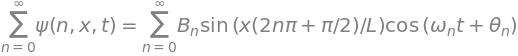

In [19]:
psi_suma = sym.summation(psi_particular, (sym.Symbol('n'), 0, sym.oo) )
psi_suma

#### Relación de dispersión
La frecuencia $\omega_n$ está determinada por la relación de dispersión.
Para una cuerda con densidad lineal $\mu$ sometida a una tensión $T_0$ es

In [20]:
T_0, mu= sym.symbols('mu, T_0', positive= True) # parámetros físicos
omega_n_ecuación = sym.Eq(omega_n, sym.sqrt(T_0/mu)* k_n.lhs)
omega_n_ecuación

Con esto finalmente se arriba a una solución general

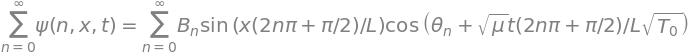

In [21]:
psi_general = psi_suma.subs(omega_n, omega_n_ecuación.rhs).subs(k_n.lhs, k_n.rhs )
psi_general

### $\frac{\partial \psi}{\partial x}(0,t)= \frac{\partial\psi}{\partial x}(L,t) = 0$ (ambos extremos se encuentran libres)
Tarea.

### Sistema de coordenadas con $x=0$ en el centro de la cuerda.

Esto quita la sencillez que acarreaba en el caso de un extremo en $x=0$ el que se anule uno de los coeficientes de las trigonométricas, $B$ o $C$, en la parte espacial.

Veamos el caso de extremos fijos. En el extremo a la izquierda

In [22]:
psi_centro_fijos_izquierda_condición = psi_propuesta.subs([(x, -L/2), (psi.subs(x,-L/2), 0) ] )
psi_centro_fijos_izquierda_condición

y en el derecho

In [23]:
psi_centro_fijos_derecha_condición = psi_propuesta.subs([(x, L/2), (psi.subs(x,L/2), 0) ] )
psi_centro_fijos_derecha_condición

Si se mantiene esta simetría geométrica y no se elige un origen que complique más las cosas, no es dificil ver que pueden sumarse ambas ecuaciones para obtener una sencilla de resolver.

In [24]:
psi_centro_fijos_condición = sym.Eq(0, (psi_centro_fijos_izquierda_condición.rhs + 
                                        psi_centro_fijos_derecha_condición.rhs).simplify() 
                                   )
psi_centro_fijos_condición

Y de aquí puede continuarse resolviendo como el caso visto.

In [25]:
coskcentro_fijos_condición = sym.Eq( psi_centro_fijos_condición.args[1].args[2], 0)
coskcentro_fijos_condición

In [27]:
k_fijos_condición = sym.Eq(k, sym.solveset(coskcentro_fijos_condición, k).args[0], evaluate= False )
k_fijos_condición

¿Se corresponden estos con los $k_n$ obtenidos con el otro origen de coordenadas? Revisar en  la clase de teoría.